In [6]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import ogcore.output_plots as op
import ogcore.parameter_plots as pp
import ogcore.output_tables as ot
from ogcore.utils import safe_read_pickle

# set plot style
plt.style.use("ogcore.OGcorePlots")
# set current directory
CUR_DIR = os.getcwd()

In [2]:
# Set path for simulation to use
sim_path = os.path.join(CUR_DIR, "..", "run_scripts", "OG-ZAF-Education")

In [3]:
# read in output from health ins simulation
base_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "model_params.pkl"
        )
    )
base_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "TPI", "TPI_vars.pkl"
        )
    )
educ_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_EDUC", "model_params.pkl"
        )
    )
educ_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_EDUC", "TPI", "TPI_vars.pkl"
        )
    )
educ_cost_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_EDUC_SPEND", "model_params.pkl"
        )
    )
educ_cost_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_EDUC_SPEND", "TPI", "TPI_vars.pkl"
        )
    )



/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_1647/3003736993.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


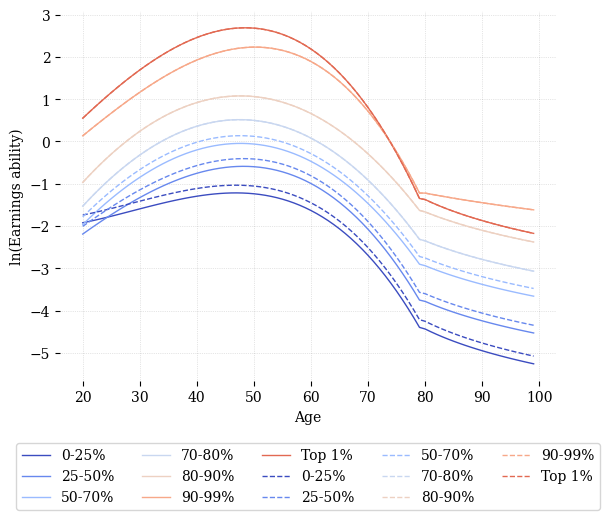

In [11]:
# Plot the change in earnings ability
fig = pp.plot_ability_profiles(
                base_params,
                p2=educ_params,
                log_scale=True,
                t=30,
                include_title=False,
            )
fig.show()

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_1647/4225585100.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


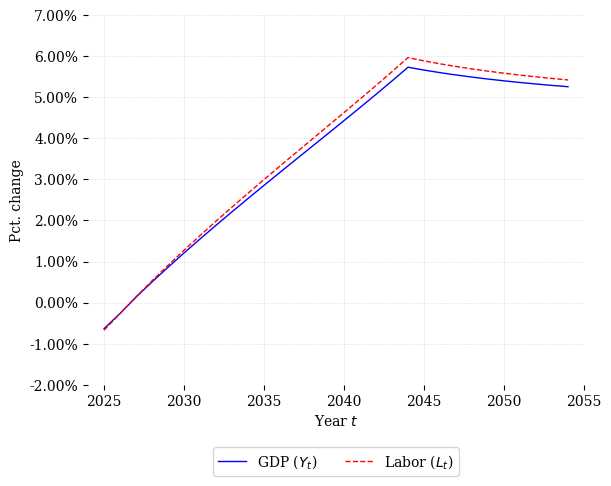

In [12]:
# use a op function to plot pct diff in GDP, L
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=educ_tpi,
    reform_params=educ_params,
    var_list=["Y","L"],
    plot_type="pct_diff",
    num_years_to_plot=30,
    start_year=base_params.start_year
    )
fig.show()


/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_1647/3257688617.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


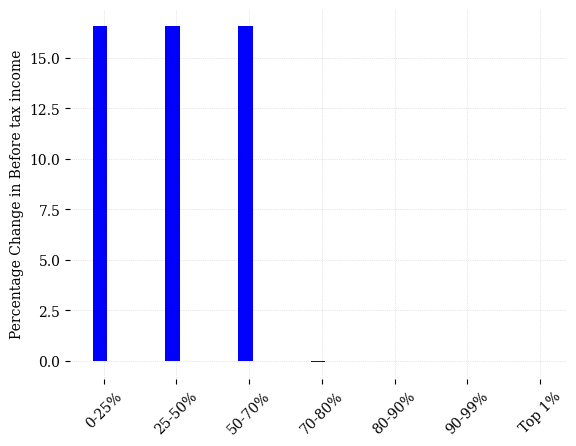

In [13]:
# Plot income by percentile
fig = op.ability_bar(
    base_tpi,
    base_params,
    educ_tpi,
    educ_params,
    var="y_before_tax_mat",
    num_years=5,
    start_year=base_params.start_year + 30,
)
fig.show()

# Now what if we consider costs also... debt financed

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_1647/3231411660.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


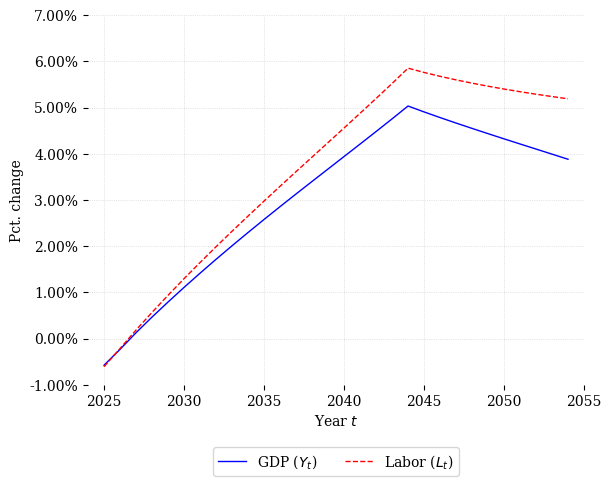

In [14]:
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=educ_cost_tpi,
    reform_params=educ_cost_params,
    var_list=["Y","L"],
    plot_type="pct_diff",
    num_years_to_plot=30,
    start_year=base_params.start_year
    )
fig.show()

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_35548/1198215682.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


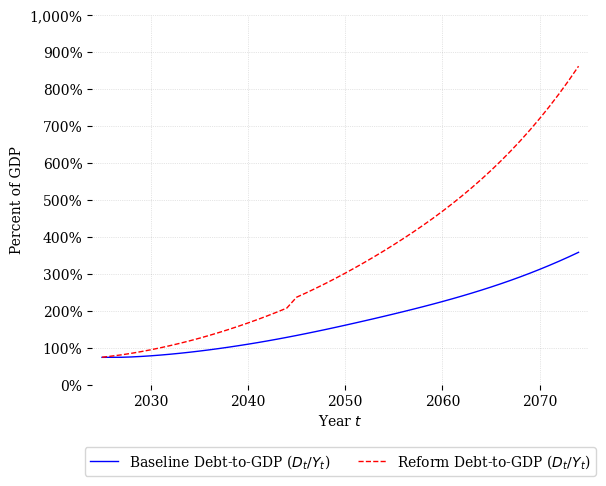

In [25]:
# debt to GDP
fig = op.plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=educ_cost_tpi,
    reform_params=educ_cost_params,
    var_list=["D"],
    plot_type="levels",
    num_years_to_plot=50,
    start_year=base_params.start_year,
)
fig.show()

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_1647/3716515953.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


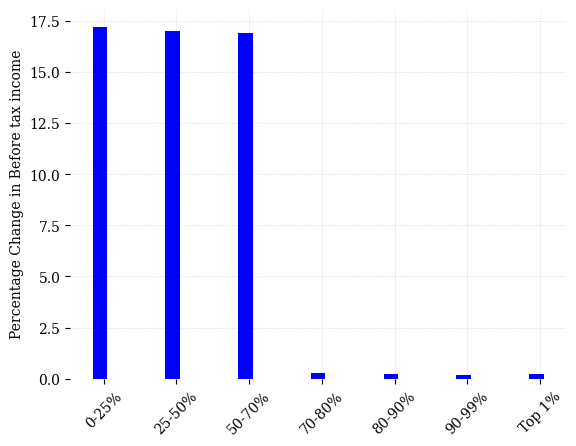

In [15]:
# Plot income and labor supply by percentile
fig = op.ability_bar(
    base_tpi,
    base_params,
    educ_cost_tpi,
    educ_cost_params,
    var="y_before_tax_mat",
    num_years=5,
    start_year=base_params.start_year + 30,
)
fig.show()